In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electronics/electronics.csv


# Overview
# This document provides a detailed explanation of a product recommendation system implemented using Python. The system uses clustering techniques to recommend products within the same category, ensuring diversity by selecting only one product per brand and prioritizing top-rated items.

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Loading the Dataset:



In [5]:
file_path = '/kaggle/input/electronics/electronics.csv'
electronics_df = pd.read_csv(file_path)


# Selecting Relevant Features for Clustering:

In [7]:
features = ['category', 'brand', 'rating']
df = electronics_df[features].dropna()


# Preprocessing the Data with One-Hot Encoding:

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['category', 'brand']),
        ('num', 'passthrough', ['rating'])
    ])


# Clustering with K-Means:

In [9]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', KMeans(n_clusters=10, random_state=42))])
pipeline.fit(df)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['category', 'brand']),
                                                 ('num', 'passthrough',
                                                  ['rating'])])),
                ('kmeans', KMeans(n_clusters=10, random_state=42))])

# Preparing the Cleaned DataFrame:

In [10]:
electronics_df_clean = electronics_df.dropna(subset=['category', 'brand', 'rating']).reset_index(drop=True)
assert len(electronics_df_clean) == len(df)
electronics_df_clean['cluster'] = pipeline['kmeans'].labels_


# Recommendation Function:
The function recommend_products_by_category filters products within the same category, sorts them by rating, ensures unique brands, and selects the top N products.

In [11]:
def recommend_products_by_category(category, data, num_recommendations=5):
    category_products = data[data['category'] == category]
    
    if category_products.empty:
        return f"No products found in the category '{category}'."
    
    top_rated = category_products.sort_values(by='rating', ascending=False)
    top_rated_unique_brands = top_rated.drop_duplicates(subset=['brand'])
    recommendations = top_rated_unique_brands.head(num_recommendations)
    return recommendations[['rating', 'brand', 'category']]


# Example Usage:

In [12]:
product_category = input("Enter the product category: ")
recommendations = recommend_products_by_category(product_category, electronics_df_clean, num_recommendations=5)
print(recommendations)


Enter the product category:  Headphones


        rating       brand    category
300415     5.0   Panasonic  Headphones
162822     5.0        Mpow  Headphones
299247     5.0     Philips  Headphones
162783     5.0        Bose  Headphones
233276     5.0  Etre Jeune  Headphones


# Visualizations
To provide better insights into the clustering and recommendations, let's add some visualizations.

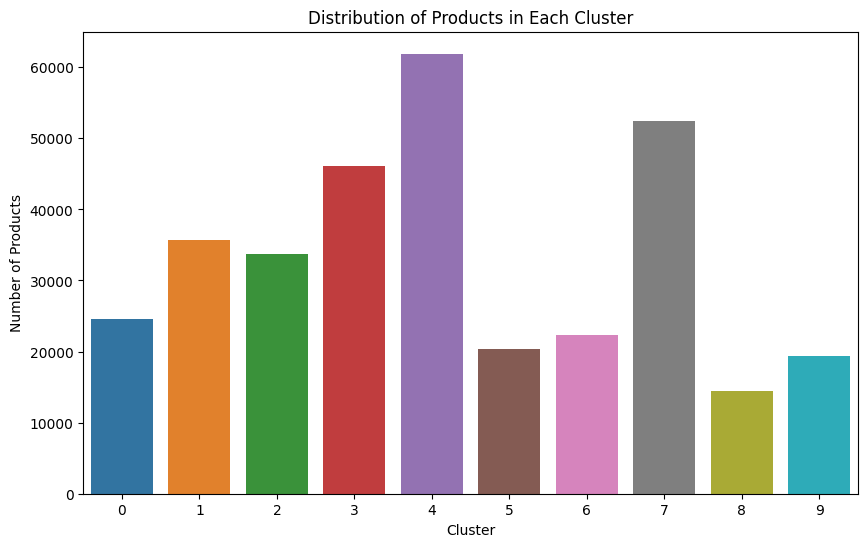

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of products in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=electronics_df_clean)
plt.title('Distribution of Products in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.show()


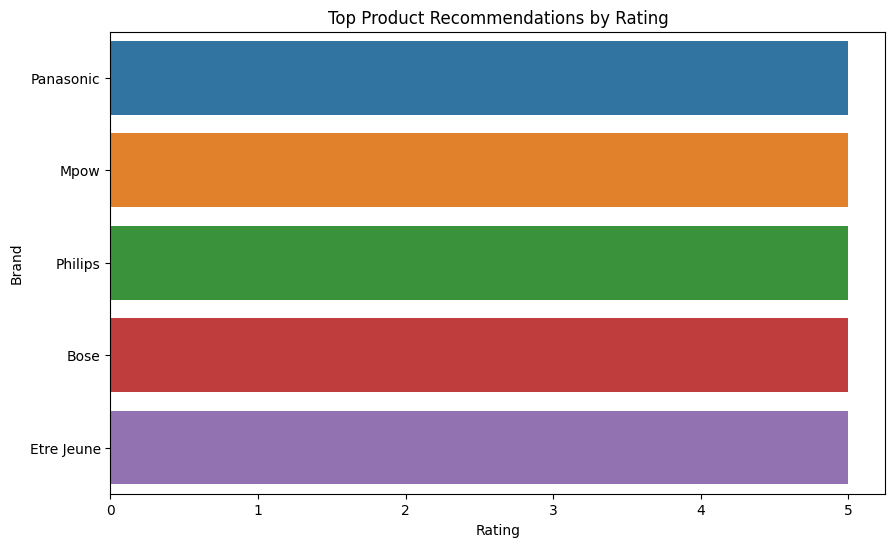

In [14]:
def visualize_recommendations(recommendations):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='rating', y='brand', data=recommendations)
    plt.title('Top Product Recommendations by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Brand')
    plt.show()

# Visualize the recommendations
visualize_recommendations(recommendations)
